In [2]:
graphics_toolkit('qt')

In [3]:
addpath('../libs/');

# Recommender Systems

in matrix $R$ stores if user i has rated movie j, $R_{ji} \in \{0, 1\}$

in matrix $Y$ stores the rating of user i to movie j, $Y_{ji} \in \{0,1,2,3,4,5\}$, and 0 means no rating for the movie

In [4]:
load('../../data/ex8_movies.mat');
whos;

Variables visible from the current scope:

variables in scope: top scope

  Attr   Name        Size                     Bytes  Class
  ====   ====        ====                     =====  ===== 
         R        1682x943                  1586126  logical
         Y        1682x943                 12689008  double
         ans         1x2                          2  char

Total is 3172254 elements using 14275136 bytes



In [5]:
fprintf('Average rating for movie 1 (Toy Story): %f / 5\n\n', ...
        mean(Y(1, R(1, :))));

Average rating for movie 1 (Toy Story): 3.878319 / 5



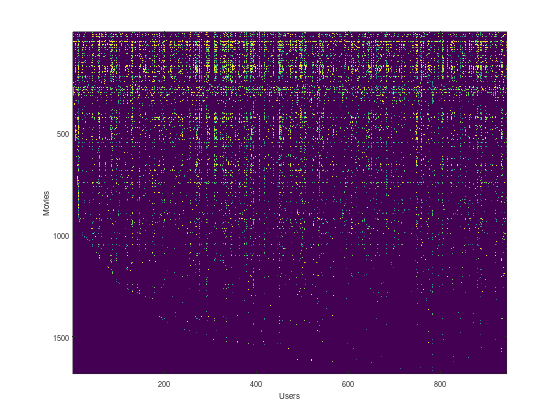

In [6]:
imagesc(Y);
ylabel('Movies');
xlabel('Users');

## Collaborative Filtering Cost function

In [7]:
load('../../data/ex8_movieParams.mat');
whos;

Variables visible from the current scope:

variables in scope: top scope

  Attr   Name              Size                     Bytes  Class
  ====   ====              ====                     =====  ===== 
         R              1682x943                  1586126  logical
         Theta           943x10                     75440  double
         X              1682x10                    134560  double
         Y              1682x943                 12689008  double
         ans               1x2                          2  char
         num_features      1x1                          8  double
         num_movies        1x1                          8  double
         num_users         1x1                          8  double

Total is 3198507 elements using 14485160 bytes



In [8]:
num_users = 4;
num_movies= 5;
num_features = 3;
X = X(1:num_movies, 1:num_features);
Theta = Theta(1:num_users, 1:num_features);
Y = Y(1:num_movies, 1:num_users);
R = R(1:num_movies, 1:num_users);

In [9]:
J = cofiCostnGradFn([X(:); Theta(:)], Y, R, num_users, num_movies, num_features, 0);
fprintf(['Cost at loaded parameters: %f '...
         '\n(this value should be about 22.22)\n'], J);

Cost at loaded parameters: 22.224604 
(this value should be about 22.22)


## Gradient

In [10]:
checkCostFunction(0);

cost = 16.773
grad =

  -3.0624e+00
   2.5034e+00
  -6.5223e+00
  -3.7957e+00
   2.5727e+00
   1.5238e+00
  -4.9807e+00
   9.1614e-01
   1.0281e-01
  -1.1915e+00
   5.7079e+00
   3.1931e+00
   2.2671e-02
   6.0986e-01
   1.9203e+00
  -1.2371e+00
  -2.1429e-01
  -2.6143e+00
  -1.5615e-01
   3.2822e+00
   3.9092e-01
   2.6814e-01
   5.6451e+00
  -3.8163e-02
  -1.1557e+01
   2.3526e+00
  -6.6143e-01

  -3.0624e+00  -3.0624e+00
   2.5034e+00   2.5034e+00
  -6.5223e+00  -6.5223e+00
  -3.7957e+00  -3.7957e+00
   2.5727e+00   2.5727e+00
   1.5238e+00   1.5238e+00
  -4.9807e+00  -4.9807e+00
   9.1614e-01   9.1614e-01
   1.0281e-01   1.0281e-01
  -1.1915e+00  -1.1915e+00
   5.7079e+00   5.7079e+00
   3.1931e+00   3.1931e+00
   2.2671e-02   2.2671e-02
   6.0986e-01   6.0986e-01
   1.9203e+00   1.9203e+00
  -1.2371e+00  -1.2371e+00
  -2.1429e-01  -2.1429e-01
  -2.6143e+00  -2.6143e+00
  -1.5615e-01  -1.5615e-01
   3.2822e+00   3.2822e+00
   3.9092e-01   3.9092e-01
   2.6814e-01   2.6814e-01
   5.

In [11]:
J = cofiCostnGradFn([X(:); Theta(:)], Y, R, num_users, num_movies, num_features, 1.5);
fprintf(['Cost at loaded parameters (lambda = 1.5): %f '...
         '\n(this value should be about 31.34)\n'], J);

Cost at loaded parameters (lambda = 1.5): 31.344056 
(this value should be about 31.34)


In [12]:
checkCostFunction(1.5);

cost = 69.839
grad =

    7.1420
    0.2901
   -1.6841
    1.2967
   -1.3943
   -0.1047
   -7.4011
  -27.8540
   16.1977
    1.2540
    2.3930
   10.3229
   -5.7784
    4.8202
   -1.0250
   -5.1480
    5.2243
  -15.1231
   14.4164
    1.3693
   -4.3122
    5.6353
    1.2044
   -2.7430
   -6.1279
   -6.1149
    6.2722

    7.1420    7.1420
    0.2901    0.2901
   -1.6841   -1.6841
    1.2967    1.2967
   -1.3943   -1.3943
   -0.1047   -0.1047
   -7.4011   -7.4011
  -27.8540  -27.8540
   16.1977   16.1977
    1.2540    1.2540
    2.3930    2.3930
   10.3229   10.3229
   -5.7784   -5.7784
    4.8202    4.8202
   -1.0250   -1.0250
   -5.1480   -5.1480
    5.2243    5.2243
  -15.1231  -15.1231
   14.4164   14.4164
    1.3693    1.3693
   -4.3122   -4.3122
    5.6353    5.6353
    1.2044    1.2044
   -2.7430   -2.7430
   -6.1279   -6.1279
   -6.1149   -6.1149
    6.2722    6.2722
The above two columns you get should be very similar.
(Left-Your Numerical Gradient, Right-Analytical Gradient)



## Entering rating for a new user

In [13]:
movieList = loadMovieList();

In [14]:
my_ratings = zeros(1682, 1);

% Check the file movie_idx.txt for id of each movie in our dataset
% For example, Toy Story (1995) has ID 1, so to rate it "4", you can set
my_ratings(1) = 4;

% Or suppose did not enjoy Silence of the Lambs (1991), you can set
my_ratings(98) = 2;

% We have selected a few movies we liked / did not like and the ratings we
% gave are as follows:
my_ratings(7) = 3;
my_ratings(12)= 5;
my_ratings(54) = 4;
my_ratings(64)= 5;
my_ratings(66)= 3;
my_ratings(69) = 5;
my_ratings(183) = 4;
my_ratings(226) = 5;
my_ratings(355)= 5;

fprintf('\n\nNew user ratings:\n');
for i = 1:length(my_ratings)
    if my_ratings(i) > 0 
        fprintf('Rated %d for %s\n', my_ratings(i), ...
                 movieList{i});
    end
end



New user ratings:
Rated 4 for Toy Story (1995)
Rated 3 for Twelve Monkeys (1995)
Rated 5 for Usual Suspects, The (1995)
Rated 4 for Outbreak (1995)
Rated 5 for Shawshank Redemption, The (1994)
Rated 3 for While You Were Sleeping (1995)
Rated 5 for Forrest Gump (1994)
Rated 2 for Silence of the Lambs, The (1991)
Rated 4 for Alien (1979)
Rated 5 for Die Hard 2 (1990)
Rated 5 for Sphere (1998)


## Learing movie ratings

In [83]:
load('../../data/ex8_movies.mat');
whos;

Variables visible from the current scope:

variables in scope: top scope

  Attr   Name                    Size                     Bytes  Class
  ====   ====                    ====                     =====  ===== 
         J                       1x1                          8  double
         R                    1682x943                  1586126  logical
         Theta                 944x10                     75520  double
         X                    1682x10                    134560  double
         Y                    1682x943                 12689008  double
         Ymean                1682x1                      13456  double
         Ynorm                1682x944                 12702464  double
         ans                     1x16                        16  char
         baseMovie               1x1                          8  double
         diff                    1x1                          8  double
         error                   1x1                          8 

In [84]:
Y = [my_ratings Y];
R = [(my_ratings ~= 0) R];

In [85]:
[Ynorm, Ymean] = normalizeRatings(Y, R);

In [86]:
num_users = size(Y, 2);
num_movies = size(Y, 1);
num_features = 10;

In [87]:
% set initial parameters, Theta, X
X = randn(num_movies, num_features);
Theta = randn(num_users, num_features);
initial_parameters = [X(:); Theta(:)];

In [88]:
options = optimset('GradObj', 'on', 'MaxIter', 100);
lambda = 10;

In [89]:
theta = fmincg(@(t)(cofiCostnGradFn(t, Ynorm, R, num_users, num_movies, num_features, lambda)), ...
            initial_parameters, options);
X = reshape(theta(1:num_movies*num_features), num_movies, num_features);
Theta = reshape(theta(num_movies*num_features+1:end), num_users, num_features);
fprintf('Recommender system learning completed.\n');

Recommender system learning completed.


## Recommendation for you

In [90]:
p = X * Theta' + Ymean;
my_predictions = p(:, 1);

In [91]:
topk = 10;
[r, ix] = sort(my_predictions, 'descend');
fprintf('\nTop %d recommendation for you\n', topk);
for i=1:topk
    j = ix(i);
    fprintf('Predicting rating %.1f for movie %s\n', my_predictions(j), movieList{j});
end

fprintf('\n\nOriginal ratings provided:\n');
for i=1:length(my_ratings)
    if my_ratings(i) > 0
        fprintf('Rated %d for %s\n', my_ratings(i), movieList{i});
    end
end


Top 10 recommendation for you
Predicting rating 5.0 for movie Marlene Dietrich: Shadow and Light (1996)
Predicting rating 5.0 for movie Saint of Fort Washington, The (1993)
Predicting rating 5.0 for movie They Made Me a Criminal (1939)
Predicting rating 5.0 for movie Entertaining Angels: The Dorothy Day Story (1996)
Predicting rating 5.0 for movie Aiqing wansui (1994)
Predicting rating 5.0 for movie Santa with Muscles (1996)
Predicting rating 5.0 for movie Prefontaine (1997)
Predicting rating 5.0 for movie Someone Else's America (1995)
Predicting rating 5.0 for movie Star Kid (1997)
Predicting rating 5.0 for movie Great Day in Harlem, A (1994)


Original ratings provided:
Rated 4 for Toy Story (1995)
Rated 3 for Twelve Monkeys (1995)
Rated 5 for Usual Suspects, The (1995)
Rated 4 for Outbreak (1995)
Rated 5 for Shawshank Redemption, The (1994)
Rated 3 for While You Were Sleeping (1995)
Rated 5 for Forrest Gump (1994)
Rated 2 for Silence of the Lambs, The (1991)
Rated 4 for Alien (1979

show the error between prediction and our rating

In [92]:
rated = find(my_ratings > 0);
for i = 1:length(rated)
    idx = rated(i);
    diff = my_predictions(idx) - my_ratings(idx);
    fprintf('predict %f, I rated %d, diff=%f for movie (%d) %s\n', my_predictions(idx), my_ratings(idx), diff, idx, movieList{idx})
end

predict 4.002275, I rated 4, diff=0.002275 for movie (1) Toy Story (1995)
predict 3.708693, I rated 3, diff=0.708693 for movie (7) Twelve Monkeys (1995)
predict 4.412436, I rated 5, diff=-0.587564 for movie (12) Usual Suspects, The (1995)
predict 3.419176, I rated 4, diff=-0.580824 for movie (54) Outbreak (1995)
predict 4.561244, I rated 5, diff=-0.438756 for movie (64) Shawshank Redemption, The (1994)
predict 3.658508, I rated 3, diff=0.658508 for movie (66) While You Were Sleeping (1995)
predict 4.128701, I rated 5, diff=-0.871299 for movie (69) Forrest Gump (1994)
predict 4.160166, I rated 2, diff=2.160166 for movie (98) Silence of the Lambs, The (1991)
predict 4.062832, I rated 4, diff=0.062832 for movie (183) Alien (1979)
predict 3.622628, I rated 5, diff=-1.377372 for movie (226) Die Hard 2 (1990)
predict 3.082827, I rated 5, diff=-1.917173 for movie (355) Sphere (1998)


List Top K related movies

the distance of movie $i$ and $j$ is defined as

$d_{ji} = \|x^{(i)} - x^{(j)}\|$

In [104]:
topk = 10;
baseMovie=546;
relatedMovies = topkRelatedMovies(X, baseMovie, topk);
fprintf('Top %d movies related to %s\n\n', topk, movieList{baseMovie});
for i = 1:length(relatedMovies)
    idx = relatedMovies(i);
    fprintf('(%d) %s\n', idx, movieList{idx});
end

Top 10 movies related to Broken Arrow (1996)

(226) Die Hard 2 (1990)
(1047) Multiplicity (1996)
(291) Absolute Power (1997)
(742) Ransom (1996)
(561) Mary Shelley's Frankenstein (1994)
(829) Fled (1996)
(849) Days of Thunder (1990)
(841) Glimmer Man, The (1996)
(808) Program, The (1993)
(120) Striptease (1996)
